# 1) K√ºt√ºphane ƒ∞mport

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [209]:
#C   Other Features
#p | x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
#e | x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g

# Ham  Dataset in  formatƒ± yukardaki gibi 
# Class deƒüeri ilk s√ºt√ºn, (p ve e deƒüerlerini i√ßeriyor) (edible=e, poisonous=p)

# 2) Veriyi ƒ∞√ße Aktarma

In [210]:
# S√ºtun isimlerini tanƒ±mla
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor',
           'gill-attachment','gill-spacing','gill-size','gill-color',
           'stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color',
           'ring-number','ring-type','spore-print-color',
           'population','habitat']

# Veriyi oku
df = pd.read_csv('agaricus-lepiota.data', names=columns)

# 3) Dataset Kontrolleri

In [211]:
# D√ºzenlenmi≈ü veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂ster
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [212]:
# D√ºzenlenmi≈ü veri setinin son 5 satƒ±rƒ±nƒ± g√∂ster
df.tail()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8113     e         k           s         n       f    n               a   
8114     e         x           s         n       f    n               a   
8115     e         f           s         n       f    n               a   
8116     p         k           y         n       f    y               f   
8117     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8113            c         b          y  ...                        s   
8114            c         b          y  ...                        s   
8115            c         b          n  ...                        s   
8116            c         n          b  ...                        k   
8117            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8113                      o                      o         p          o   
8114                      o                      o         p          n   
8115                      o                      o         p          o   
8116                      w                      w         p          w   
8117                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8113           o         p                 b          c       l  
8114           o         p                 b          v       l  
8115           o         p                 b          c       l  
8116           o         e                 w          v       l  
8117           o         p                 o          c       l  

[5 rows x 23 columns]

In [213]:
# Datasetin i√ßindeki '?' deƒüerlerini kontrol et
df.isin(['?']).sum()

#√áƒ±ktƒ±:
# Sadece '?' deƒüerleri 'stalk-root' s√ºtununda var 2480 adet

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [214]:
# Datasetin i√ßinde bo≈ü deƒüerleri kontrol et
df.isnull().sum()

#√áƒ±ktƒ±:
# Sadece 'stalk-root' s√ºtununda bo≈ü deƒüerler var 2480 adet (? olarak g√∂z√ºk√ºyor)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [215]:
# Class deƒüerlerinin daƒüƒ±lƒ±mƒ±nƒ± kontrol et
df['class'].value_counts()

#√áƒ±ktƒ±: (Dengeli)
# e    4208
# p    3916

class
e    4205
p    3913
Name: count, dtype: int64

In [216]:

df.info()
#Dataset genel bilgileri
#√áƒ±ktƒ±:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 23 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8118 non-null   object
 1   cap-shape                 8118 non-null   object
 2   cap-surface               8118 non-null   object
 3   cap-color                 8118 non-null   object
 4   bruises                   8118 non-null   object
 5   odor                      8118 non-null   object
 6   gill-attachment           8118 non-null   object
 7   gill-spacing              8118 non-null   object
 8   gill-size                 8118 non-null   object
 9   gill-color                8118 non-null   object
 10  stalk-shape               8118 non-null   object
 11  stalk-root                8118 non-null   object
 12  stalk-surface-above-ring  8118 non-null   object
 13  stalk-surface-below-ring  8118 non-null   object
 14  stalk-color-above-ring  

In [217]:
#Tekrar eden deƒüerleri kontrol et
df.duplicated().sum()
#√áƒ±ktƒ±:
# 0


np.int64(0)

# 4) Data Analaizi ve Ke≈üfi

In [218]:
# Datasetin ayrƒ±ntƒ±lƒ± bilgilerini kontrol et
df.describe().T

count unique top  freq
class                     8118      2   e  4205
cap-shape                 8118      6   x  3653
cap-surface               8118      4   y  3244
cap-color                 8118     10   n  2284
bruises                   8118      2   f  4745
odor                      8118      9   n  3526
gill-attachment           8118      2   f  7908
gill-spacing              8118      2   c  6808
gill-size                 8118      2   b  5606
gill-color                8118     12   b  1728
stalk-shape               8118      2   t  4604
stalk-root                8118      5   b  3773
stalk-surface-above-ring  8118      4   s  5173
stalk-surface-below-ring  8118      4   s  4933
stalk-color-above-ring    8118      9   w  4459
stalk-color-below-ring    8118      9   w  4379
veil-type                 8118      1   p  8118
veil-color                8118      4   w  7918
ring-number               8118      3   o  7482
ring-type                 8118      5   p  3965
spore-print-color         8118      9   w  2388
population                8118      6   v  4040
habitat                   8118      7   d  3147

* Numerik bir verim olmadƒ±ƒüƒ± i√ßin ilk a≈üamada boxplot, histogram ve corr matrisi gibi metrikler ile kontrol yapmadƒ±m

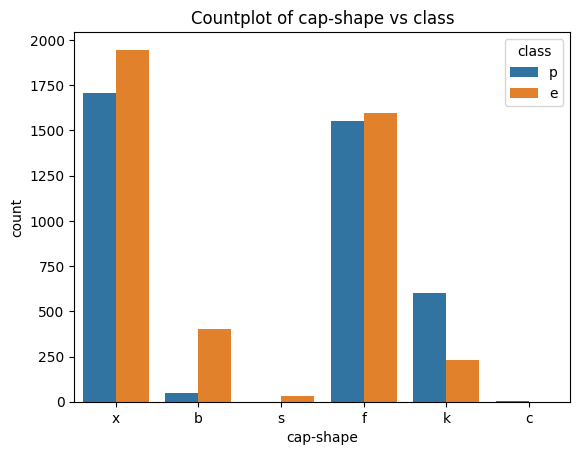

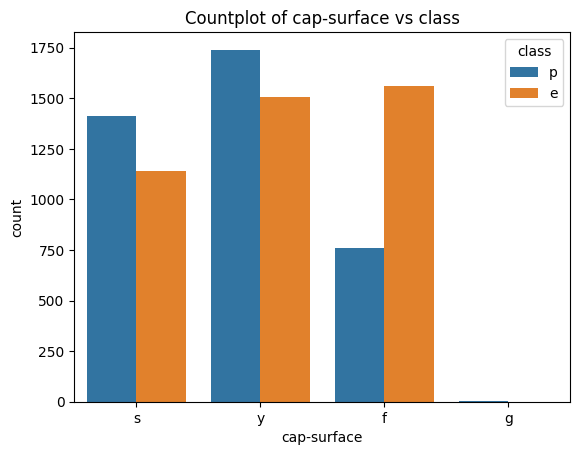

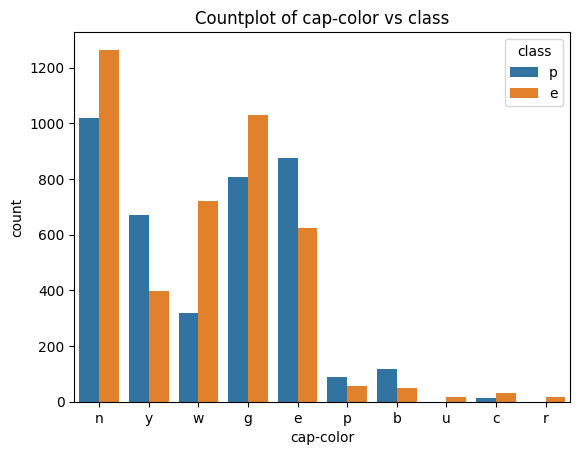

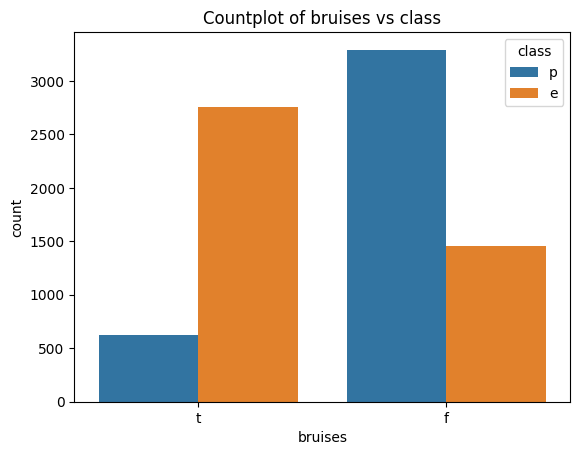

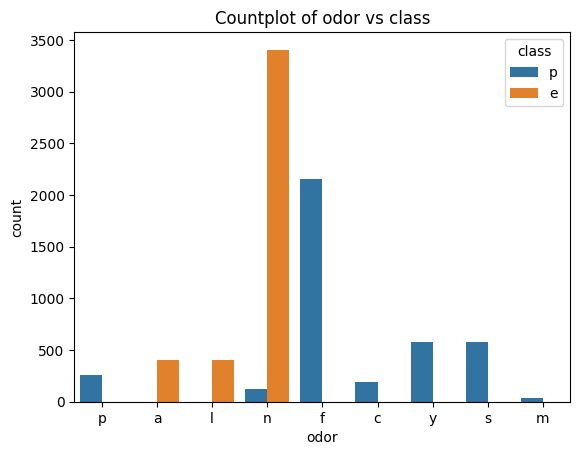

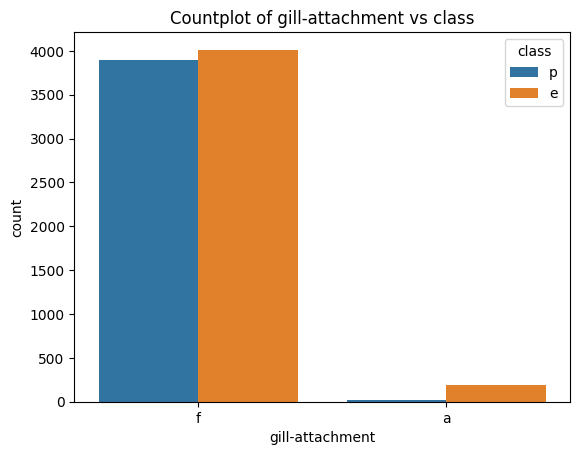

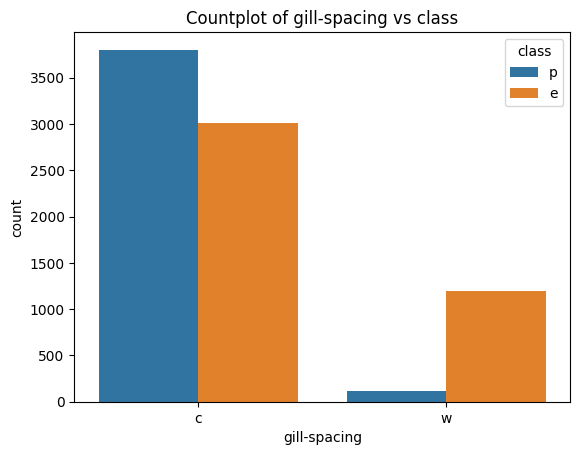

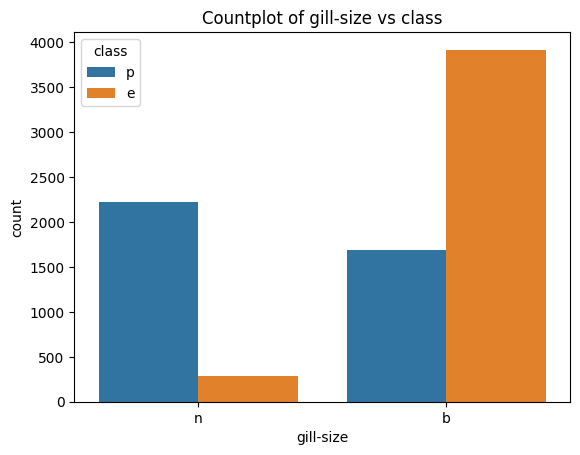

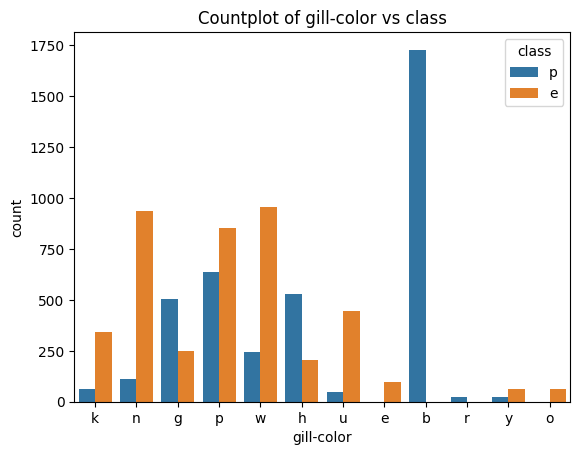

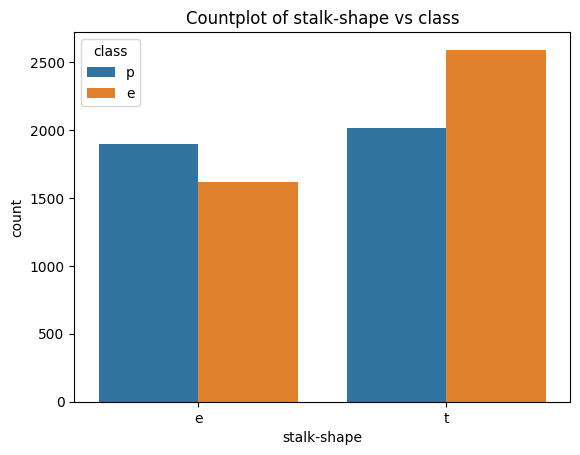

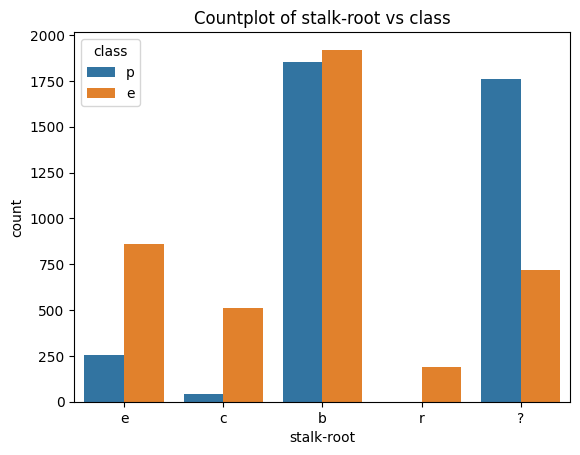

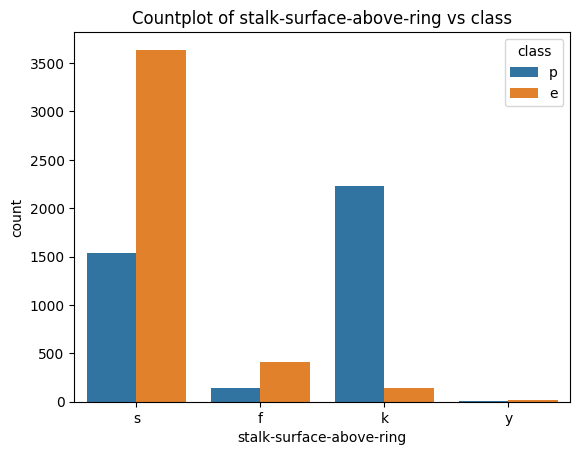

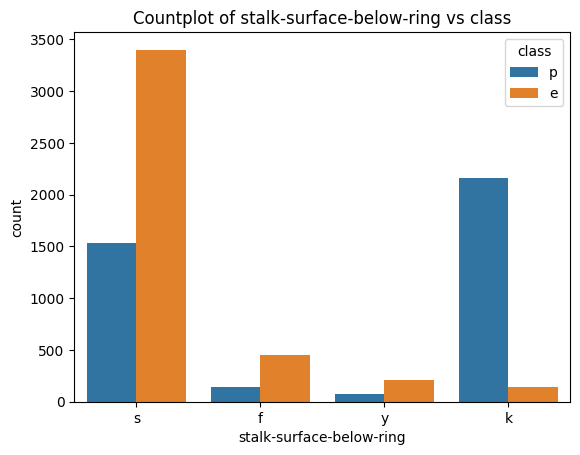

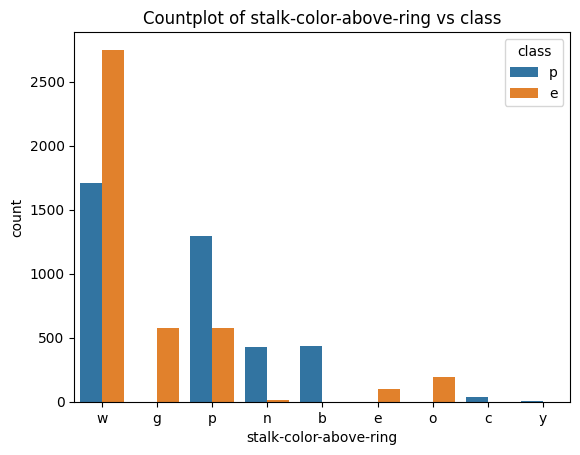

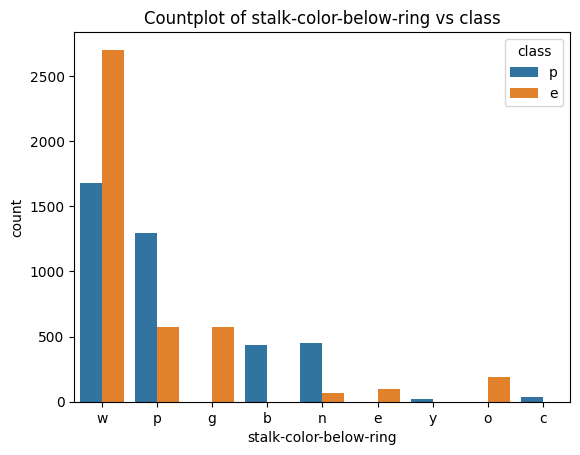

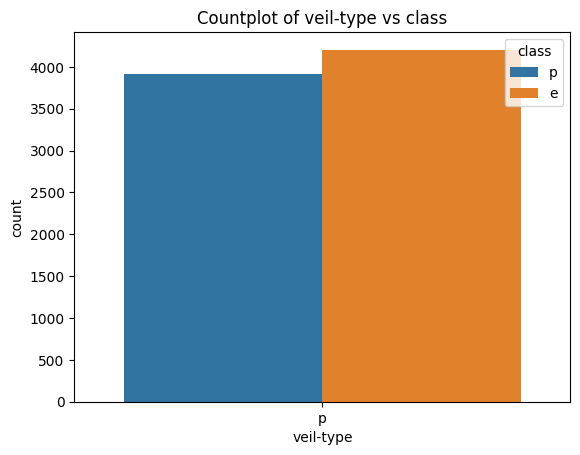

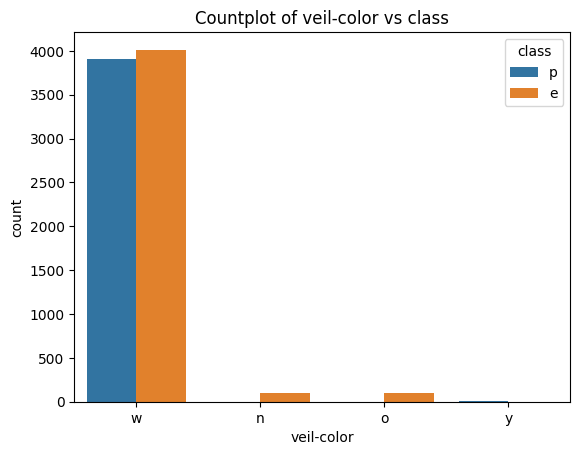

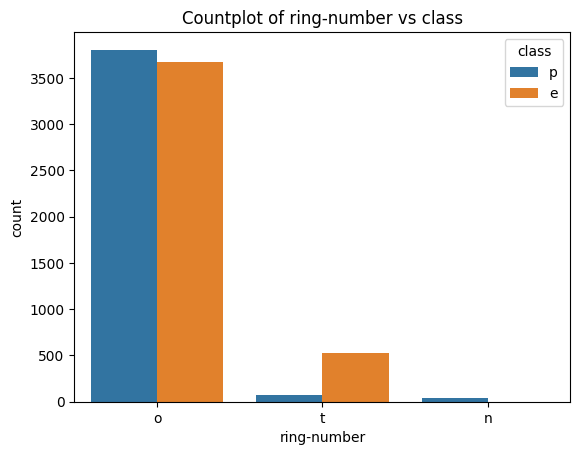

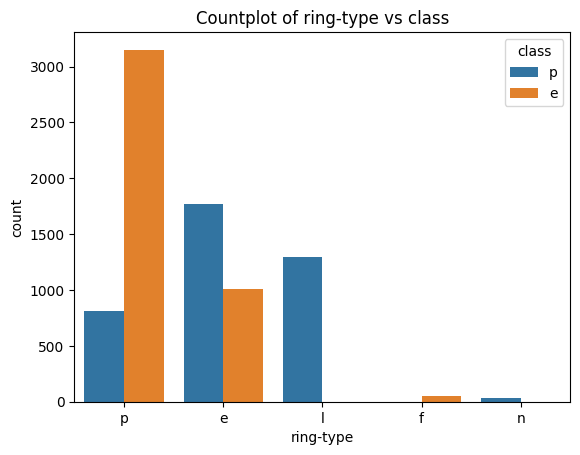

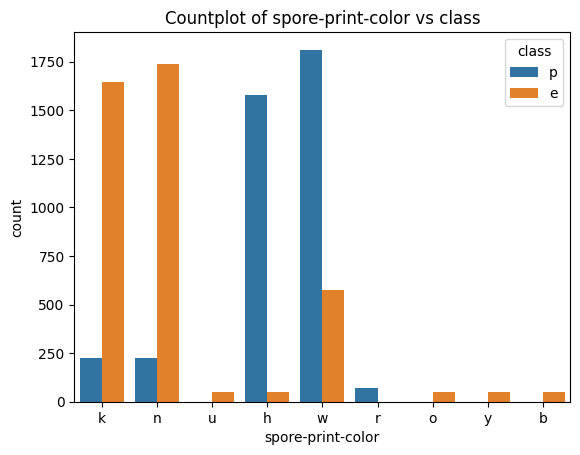

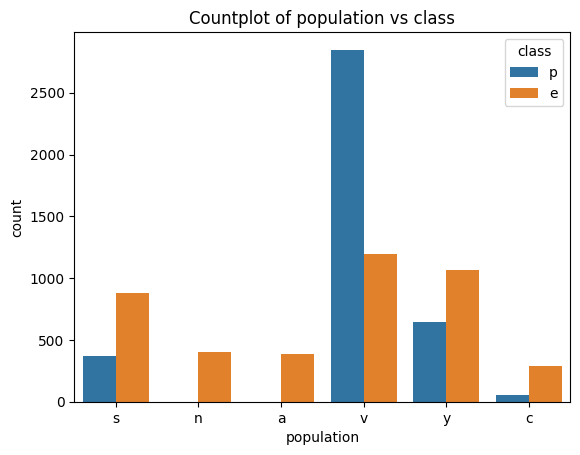

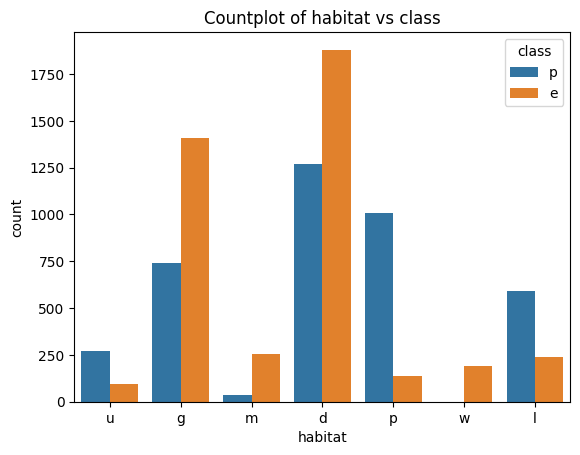

In [219]:
# Scatter plot ile ili≈ükileri anlama
for i in df.columns[1:]:
    sns.countplot(data=df, x=i, hue='class')
    plt.title(f'Countplot of {i} vs class')
    plt.show()


# sns.pairplot(df, hue='class', diag_kind='kde') 


-> Numrec degiskenler i√ßin G√ºzel √∂zellikler:
 * sns.distplot(df['price']) # o featurenin daƒüƒ±lƒ±mƒ±nƒ± veriyor g√ºzel bir analiz
 * sns.pairplot(df, hue='numeric', diag_kind='kde') 
 * df.corr()
 * df.corr["price"].sort_values()
 * verilerin %100 √º ile √ßalƒ±≈ümak istemiyorsan %99 uylada √ßalƒ±≈üabilirsin (13100 veriden 131 tanesini atabilirsin)
 * df.groupy("year").mean()["price"] -> yƒ±llarƒ± getiriyor ve yƒ±la g√∂re ortalama fiyatlarƒ± yƒ±lƒ±n yanƒ±na yazarak 2 sutunlu tablo olu≈üturuyor

# 5) Eksik deƒüer Yapƒ±landƒ±rmasƒ± 

In [220]:
# '?' deƒüerlerini NaN ile deƒüi≈ütir
df.replace('?', np.nan, inplace=True)

In [221]:
# Null deƒüerleri kontrol et
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

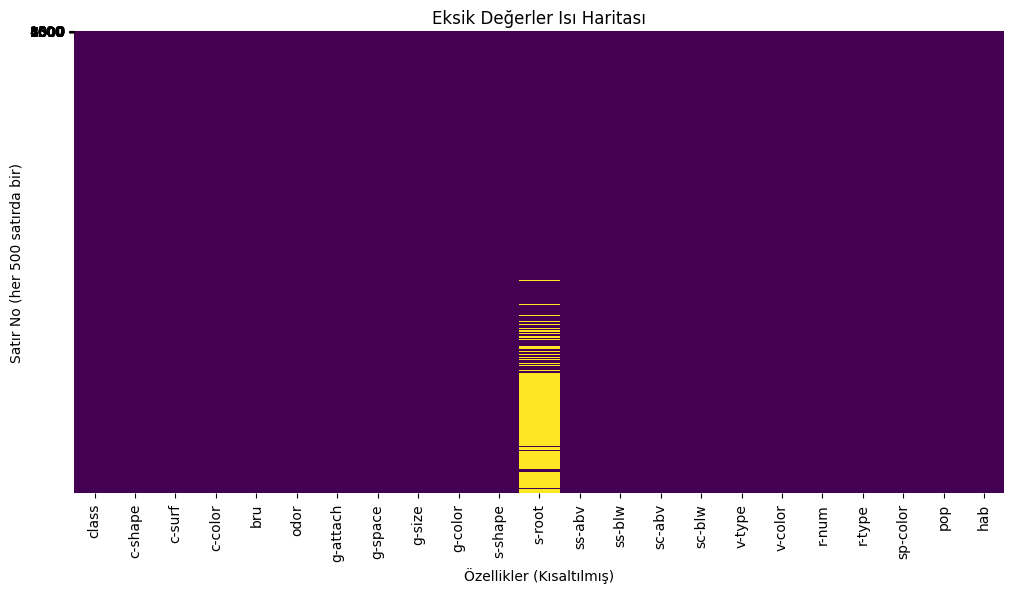

In [222]:

# bunu grafiƒüe d√∂k
# S√ºtun adlarƒ±nƒ± kƒ±salt
short_names = {
    'cap-shape': 'c-shape', 'cap-surface': 'c-surf', 'cap-color': 'c-color',
    'bruises': 'bru', 'odor': 'odor', 'gill-attachment': 'g-attach',
    'gill-spacing': 'g-space', 'gill-size': 'g-size', 'gill-color': 'g-color',
    'stalk-shape': 's-shape', 'stalk-root': 's-root', 'stalk-surface-above-ring': 'ss-abv',
    'stalk-surface-below-ring': 'ss-blw', 'stalk-color-above-ring': 'sc-abv',
    'stalk-color-below-ring': 'sc-blw', 'veil-type': 'v-type', 'veil-color': 'v-color',
    'ring-number': 'r-num', 'ring-type': 'r-type', 'spore-print-color': 'sp-color',
    'population': 'pop', 'habitat': 'hab'
}
df_short = df.rename(columns=short_names)

plt.figure(figsize=(12, 6))
# Her 500. satƒ±rƒ± etiket olarak g√∂ster (isteƒüe g√∂re aralƒ±ƒüƒ± deƒüi≈ütirebilirsin)
ytick_freq = 500
yticks = list(range(0, df_short.shape[0], ytick_freq))
sns.heatmap(
    df_short.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=[str(i) for i in yticks] + [''] if df_short.shape[0] % ytick_freq != 0 else [str(i) for i in yticks]
)
plt.title('Eksik Deƒüerler Isƒ± Haritasƒ±')
plt.xlabel('√ñzellikler (Kƒ±saltƒ±lmƒ±≈ü)')
plt.ylabel('Satƒ±r No (her {} satƒ±rda bir)'.format(ytick_freq))
plt.show()

In [223]:
df['stalk-root'].value_counts()

stalk-root
b    3773
e    1118
c     555
r     192
Name: count, dtype: int64

üìå stalk-root √ñzelliƒüi √ñzeti:

* Toplam: 8124 veri

* Eksik deƒüer: 2480 (~%30.5 ‚Üí az deƒüil)

Kategori daƒüƒ±lƒ±mƒ±:

- b: 3776 (~46.5%)

- e: 1120 (~13.8%)

- c: 556 (~6.9%)

- r: 192 (~2.4%)



- Eksik verileri doldurmak i√ßin doƒüru y√∂ntem se√ßilmeli
- √ñrneƒüin ortalama ,ortanca, mod yada KNNinputer gibi y√∂ntemler kullanƒ±labilir
- Yaygƒ±n olarak eksik numeric verileri doldurmak i√ßin KNN imputer kullanƒ±lƒ±r. (bizim i√ßin uygun deƒüil)
- Yaygƒ±n olarak eksik Kategorik verileri doldurmak i√ßin en sƒ±k ge√ßen deƒüer (Mode) kullanƒ±lƒ±r.
- Ama Biz burda en iyi performans vereceƒüini d√º≈ü√ºnd√ºƒü√ºm i√ßin √∂zellik deƒüerlerinin aƒüƒ±rlƒ±klarƒ±na oranla rastgele deƒüerlerle dolduracaƒüƒ±z

In [224]:
# Mevcut eksik olmayan deƒüerleri bir diziye alalƒ±m
values = df['stalk-root'].dropna().values
# Eksik deƒüer sayƒ±sƒ±nƒ± hesaplayalƒ±m
missing_count = df['stalk-root'].isnull().sum()

# Mevcut deƒüerlerden eksik deƒüer sayƒ±sƒ± kadar rastgele se√ßiyoruz
# Bu deƒüerlerin daƒüƒ±lƒ±mƒ±nƒ± koruyarak eksik deƒüerleri dolduracaƒüƒ±z
# Rastgele se√ßim yaparken mevcut deƒüerlerin daƒüƒ±lƒ±mƒ±nƒ± korumak i√ßin p parametresini kullanƒ±yoruz.
# replace=True ‚Üí aynƒ± deƒüer birden fazla se√ßilebilir
imputed_values = np.random.choice(['b', 'e', 'c', 'r'], size=missing_count, replace=True, p=[0.4, 0.3, 0.2, 0.1])

# Eksik deƒüerleri bu rastgele se√ßilen deƒüerlerle dolduruyoruz
df.loc[df['stalk-root'].isnull(), 'stalk-root'] = imputed_values

In [225]:
# Null deƒüerleri kontrol et
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 6) Outliers Yapƒ±landƒ±rmasƒ± 


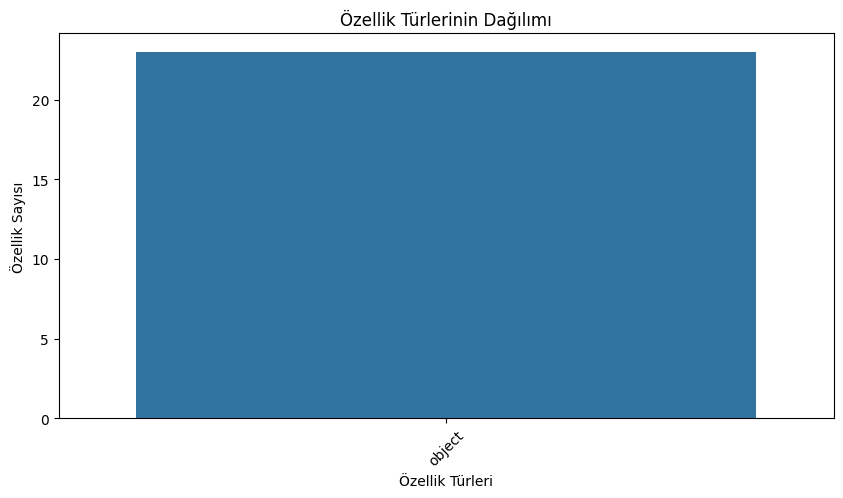

In [226]:
# char int ve string √∂zellikleri saysƒ±nƒ± grafikte g√∂ster
def plot_feature_types(df):
    feature_types = df.dtypes.value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_types.index.astype(str), y=feature_types.values)
    plt.title('√ñzellik T√ºrlerinin Daƒüƒ±lƒ±mƒ±')
    plt.xlabel('√ñzellik T√ºrleri')
    plt.ylabel('√ñzellik Sayƒ±sƒ±')
    plt.xticks(rotation=45)
    plt.show() 

plot_feature_types(df)


- Mushroom dataset'inde veriler kategorik olduƒüu i√ßin outlier Yapƒ±landƒ±rmasƒ±na gerek yok
- Eƒüer yapmak isteydik boxplot √ßizdirerek aykƒ±rƒ± deƒüerleri tespit edebilirdik

# 7) Tekrar Eden ve ƒ∞≈üeyaramaz verilerin Yapƒ±landƒ±rmasƒ±

In [227]:
# √áift deƒüerleri kontrol et
df.duplicated().sum()
#√áƒ±ktƒ±:
# 0

np.int64(0)

# 8) Data Encoding
 

üìå Class S√ºt√ºnu

- Binary target (e / p) ‚Üí yani 2 sƒ±nƒ±flƒ± bir hedef deƒüi≈üken
- üìå Label Encoding en doƒüru ve standart y√∂ntemdir.
- ‚úÖ class ‚Üí Label Encoding

üìå Diƒüer S√ºt√ºnlar

- üçÑ cap-shape ‚Üí bell, conical, convex, flat, knobbed, sunken
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ cap-surface ‚Üí fibrous, grooves, scaly, smooth
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ cap-color ‚Üí brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow
- ‚úÖ Sƒ±rasƒ±z renkler ‚Üí One-hot

- üçÑ bruises? ‚Üí bruises, no
- üìå Binary ama herhangi bir sƒ±ralama yok, burada

- DL modeline direkt Label encoding verilebilir (0/1)

- Ama modelin katmanlarƒ±nda bias yaratmamasƒ± i√ßin One-hot encoding tercih edilir
- ‚úÖ Yani burada One-hot encoding

- üçÑ odor ‚Üí almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ gill-attachment ‚Üí attached, descending, free, notched
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ gill-spacing ‚Üí close, crowded, distant
- ‚úÖ Sƒ±ralƒ± gibi durabilir (crowded < close < distant?) ama veri s√∂zl√ºƒü√ºnde b√∂yle bir bilgi yok, sƒ±ralama anlamƒ± yok ‚Üí One-hot

- üçÑ gill-size ‚Üí broad, narrow
- üìå Binary ama sƒ±ralama var mƒ±?
- B ‚Üí geni≈ü N ‚Üí dar
- Belki sƒ±ralƒ± sayƒ±labilir ama √ßoƒüu DL uygulamasƒ±nda One-hot encoding tercih edilir
- ‚úÖ Yine One-hot

- üçÑ gill-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-shape ‚Üí enlarging, tapering
- üìå 2 deƒüerli ama sƒ±ralƒ± deƒüil
- ‚úÖ One-hot

- üçÑ stalk-root ‚Üí bulbous, club, cup, equal, rhizomorphs, rooted, missing
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-surface-above-ring ‚Üí fibrous, scaly, silky, smooth
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-surface-below-ring ‚Üí aynƒ± ‚Üí One-hot
- üçÑ stalk-color-above-ring ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-color-below-ring ‚Üí aynƒ± ‚Üí One-hot
- üçÑ veil-type ‚Üí partial, universal
- üìå Binary ama veri daƒüƒ±lƒ±mƒ±nda genelde hep aynƒ± olabilir (kontrol et)
- Eƒüer tek tip deƒüilse ‚Üí One-hot

- üçÑ veil-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ ring-number ‚Üí none, one, two
- ‚úÖ Aslƒ±nda sayƒ± sƒ±rasƒ± var ama kategorik deƒüer olduƒüu i√ßin ve DL modelde bias yaratmamasƒ± i√ßin One-hot encoding

- üçÑ ring-type ‚Üí cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ spore-print-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ population ‚Üí abundant, clustered, numerous, scattered, several, solitary
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ habitat ‚Üí grasses, leaves, meadows, paths, urban, waste, woods
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot


In [228]:
df['veil-type'].value_counts()

veil-type
p    8118
Name: count, dtype: int64

* 'veil-type' √∂zelliƒüi sadece p deƒüeri i√ßeriyor
* Bu √∂zellik Modele katkƒ± saƒülamayacaƒüƒ± i√ßin √ßƒ±karƒ±lmƒ±≈ütƒ±r

In [229]:
# 'veil-type' s√ºtununu kaldƒ±rƒ±yoruz √ß√ºnk√º sadece tek bir deƒüere sahip
df.drop(columns=['veil-type'], inplace=True)

In [230]:
# S√ºtun isimlerini kontrol et
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

* df = Encode edilmemi≈ü, Null deƒüerleri dolduru≈ü, 'veil-type' √∂zelliƒüi √ßƒ±karƒ±lmƒ±≈ü data

In [231]:
# Class s√ºtunu i√ßin Label Encoding
le = LabelEncoder()
# kopy alƒ±yoruz √ß√ºnk√º orijinal veri setini deƒüi≈ütirmek istemiyoruz
df_encoded = df.copy()
# 'class' s√ºtununu label encoding ile sayƒ±sal deƒüerlere d√∂n√º≈üt√ºr√ºyoruz
df_encoded['class'] = le.fit_transform(df['class'])

In [232]:
# One-hot encoding uygulanacak s√ºtunlar (class hari√ß t√ºm kategorik s√ºtunlar)
one_hot_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)


* df_encoded = Encode edilmi≈ü, Null deƒüerleri dolduru≈ü, 'veil-type' √∂zelliƒüi √ßƒ±karƒ±lmƒ±≈ü data

In [233]:
df_encoded.info()
# One-hot encoding sonrasƒ± veri setinin boyutunu kontrol et
# √áƒ±ktƒ±:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 119 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Columns: 116 entries, class to habitat_w
dtypes: bool(115), int64(1)
memory usage: 975.2 KB


In [234]:
df_encoded.head()
# One-hot encoding sonrasƒ± veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂ster

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1        False        False        False        False        False   
1      0        False        False        False        False        False   
2      0         True        False        False        False        False   
3      1        False        False        False        False        False   
4      0        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0         True          False          False           True  ...   
1         True          False          False           True  ...   
2        False          False          False           True  ...   
3         True          False          False          False  ...   
4         True          False          False           True  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0          True         False         False      False      False      False   
1         False         False         False      False       True      False   
2         False         False         False      False      False      False   
3          True         False         False      False      False      False   
4         False         False         False      False       True      False   

   habitat_m  habitat_p  habitat_u  habitat_w  
0      False      False       True      False  
1      False      False      False      False  
2       True      False      False      False  
3      False      False       True      False  
4      False      False      False      False  

[5 rows x 116 columns]

In [235]:
df_encoded.shape
# √áƒ±ktƒ±:
# (8124, 119)

(8118, 116)

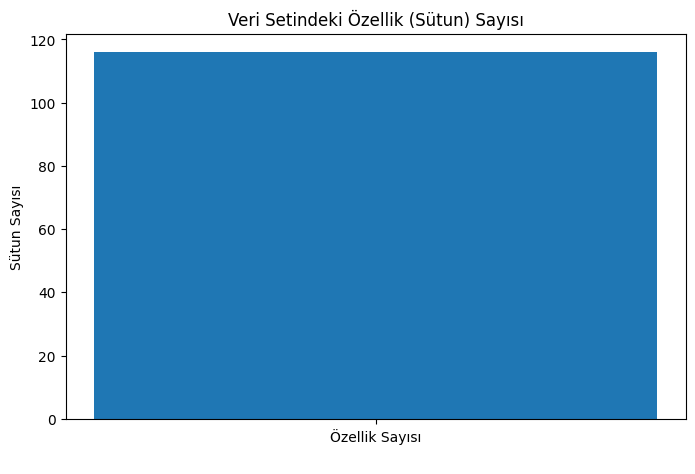

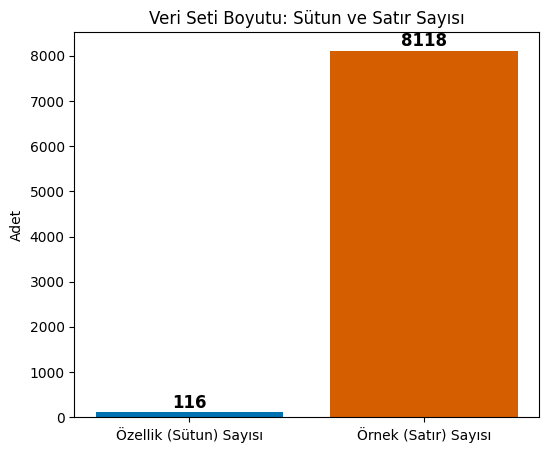

In [236]:
#df_encoded shape i√ßin grafik
plt.figure(figsize=(8, 5))
plt.bar(['√ñzellik Sayƒ±sƒ±'], [df_encoded.shape[1]])
plt.title('Veri Setindeki √ñzellik (S√ºtun) Sayƒ±sƒ±')
plt.xlabel(' ')
plt.ylabel('S√ºtun Sayƒ±sƒ±')
plt.figure(figsize=(6, 5))
plt.bar(['√ñzellik (S√ºtun) Sayƒ±sƒ±', '√ñrnek (Satƒ±r) Sayƒ±sƒ±'], [df_encoded.shape[1], df_encoded.shape[0]], color=['#0072B2', '#D55E00'])
plt.title('Veri Seti Boyutu: S√ºtun ve Satƒ±r Sayƒ±sƒ±')
plt.ylabel('Adet')
for i, v in enumerate([df_encoded.shape[1], df_encoded.shape[0]]):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold', fontsize=12)
plt.show()
plt.show()


# 9) Deep Learning ile Model Eƒüitimi

In [237]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold



In [238]:
y = df_encoded["class"].values
x = df_encoded.drop(columns=["class"]).values

In [239]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [240]:
x

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [241]:
# Modeli train ve test setine ayƒ±r
# x ve y'yi %70 train %30 test setine ayƒ±rƒ±yoruz (yaygƒ±n kullanƒ±m)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
 

In [242]:
# Ayrƒ±lan veri setlerinin boyutlarƒ±nƒ± kontrol et
len(x_train), len(x_test), len(y_train), len(y_test)

(5682, 2436, 5682, 2436)

In [243]:
scaler = MinMaxScaler()
# Veriyi √∂l√ßeklendir
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [244]:
x_train.shape

(5682, 115)

* Cross validation 

In [245]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sonu√ßlarƒ± tutmak i√ßin listeler
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(x):
    x_train_fold, x_val_fold = x[train_index], x[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # √ñl√ßekleme (her fold i√ßin yeniden fit)
    scaler_fold = MinMaxScaler()
    x_train_fold = scaler_fold.fit_transform(x_train_fold)
    x_val_fold = scaler_fold.transform(x_val_fold)
    
    # Modeli olu≈ütur
    model_fold = Sequential() 
    # 1. ƒ∞lk (Giri≈ü) Katmanlarƒ±
    # relu aktivasyon fonksiyonu, doƒürusal olmayan ili≈ükileri √∂ƒürenmeyi saƒülar
    # 115 n√∂ron, ReLU aktivasyon fonksiyonu, giri≈ü ≈üekli x_train'in boyutu
    # BatchNormalization ve Dropout katmanlarƒ± ekleriz

    # GaussianNoise: Modelin giri≈üine g√ºr√ºlt√º ekler, a≈üƒ±rƒ± √∂ƒürenmeyi √∂nler
    model_fold.add(GaussianNoise(0.1, input_shape=(x_train_fold.shape[1],)))


    model_fold.add(Dense(115, activation='relu'))
    #BatchNormalization(): 
    # Eƒüitim sƒ±rasƒ±nda katman √ßƒ±ktƒ±sƒ±nƒ± normalize eder,√∂ƒürenmeyi hƒ±zlandƒ±rƒ±r ve daha stabil hale getirir.
    model_fold.add(BatchNormalization())
    
    # Dropout: A≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemek i√ßin rastgele n√∂ronlarƒ± kapatƒ±r
    model_fold.add(Dropout(0.3))
    
    # 2. Orta (Gizli) Katmanlar
    # 64 n√∂ron, ReLU aktivasyon fonksiyonu
    model_fold.add(Dense(55, activation='relu'))
    model_fold.add(BatchNormalization())
    model_fold.add(Dropout(0.3))

    # 3. √áƒ±kƒ±≈ü Katmanƒ±
    # 1 n√∂ron, sigmoid aktivasyon fonksiyonu (binary classification i√ßin)
    # Sigmoid aktivasyon fonksiyonu, binary classification i√ßin uygundur
    model_fold.add(Dense(1, activation='sigmoid')) 

    # Binary classification i√ßin modelimizi derliyoruz
    # Binary classification i√ßin binary_crossentropy kaybƒ± kullanƒ±lƒ±r
    model_fold.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    
    # Erken durdurma
    # Erken durdurma, validation loss izlenerek modelin a≈üƒ±rƒ± √∂ƒürenmesini √∂nler

    early_stop_fold = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
    
    # Modeli eƒüit
    # Modeli eƒüitirken validation setini de kullanƒ±yoruz

    model_fold.fit(
        x_train_fold, y_train_fold,
        validation_data=(x_val_fold, y_val_fold),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop_fold],
        verbose=0
    )
    
    # Tahmin ve skorlar
    # Validation seti √ºzerinde tahmin yapƒ±yoruz
    # Tahminlerimizi binary sƒ±nƒ±flara d√∂n√º≈üt√ºr√ºyoruz (0 ve 1)
    # accuracy, precision, recall ve f1 skorlarƒ±nƒ± hesaplƒ±yoruz
    y_pred_fold = (model_fold.predict(x_val_fold) > 0.5).astype(int)
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold))
    f1_scores.append(f1_score(y_val_fold, y_pred_fold))

# Sonu√ßlarƒ± yazdƒ±r
print("\nK-Fold Sonu√ßlarƒ± (5 Fold):")
print("Ortalama Accuracy :", np.mean(accuracy_scores))
print("Ortalama Precision:", np.mean(precision_scores))
print("Ortalama Recall   :", np.mean(recall_scores))
print("Ortalama F1 Score :", np.mean(f1_scores))

c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step

K-Fold Sonu√ßlarƒ± (5 Fold):
Ortalama Accuracy : 1.0
Ortalama Precision: 1.0
Ortalama Recall   : 1.0
Ortalama F1 Score : 1.0


* Cross-validation sonu√ßlarƒ±nƒ± g√∂rselle≈ütirme

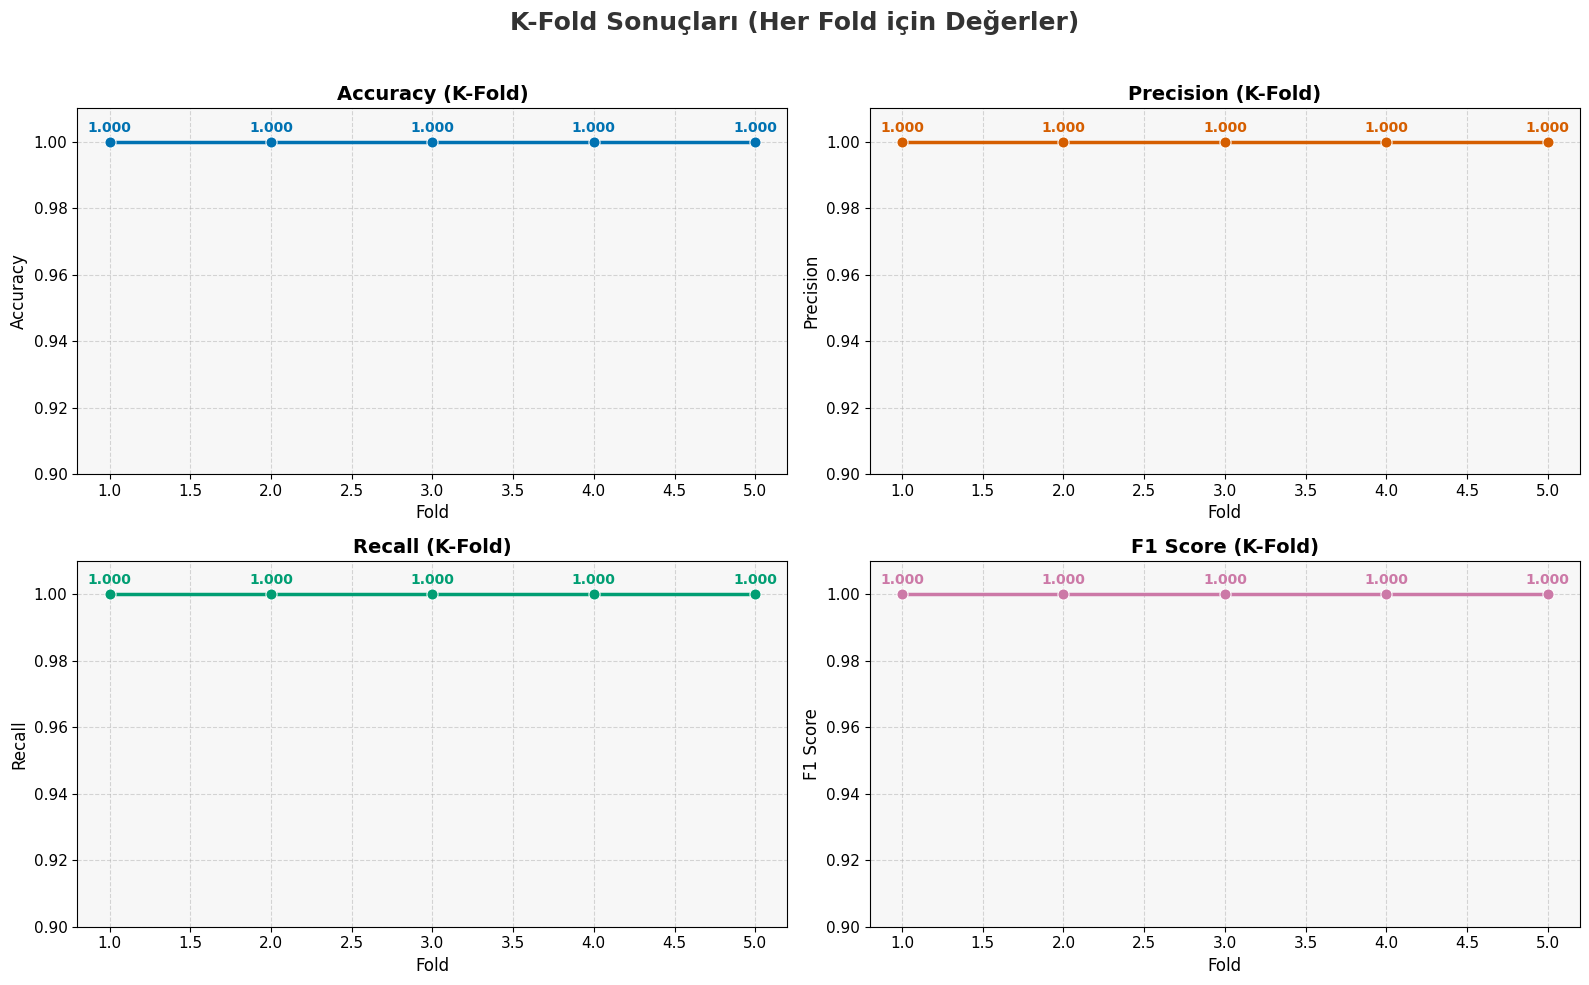

In [255]:
import matplotlib.ticker as mticker

# Cross-validation sonrasƒ± skorlarƒ± DataFrame'e aktar
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

palette = ['#0072B2', '#D55E00', '#009E73', '#CC79A7']  # Farklƒ± renkler
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(16, 10))
plt.suptitle("K-Fold Sonu√ßlarƒ± (Her Fold i√ßin Deƒüerler)", fontsize=18, fontweight='bold', color='#333333')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.lineplot(
        data=results_df, x='Fold', y=metric, marker='o', color=palette[i-1], linewidth=2.5, markersize=8
    )
    plt.title(f"{metric} (K-Fold)", fontsize=14, fontweight='bold')
    plt.ylim(0.9, 1.01)
    plt.xlabel("Fold", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#f7f7f7')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    # Her noktaya deƒüer etiketi ekle
    for x, y in zip(results_df['Fold'], results_df[metric]):
        plt.text(x, y+0.002, f"{y:.3f}", ha='center', va='bottom', fontsize=10, color=palette[i-1], fontweight='bold')
    # Y eksenini 2 ondalƒ±k g√∂ster
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [247]:
#Grafik Yorumu (K-Fold Sonu√ßlarƒ±):
# 1. **Genel Performans**: Her d√∂rt metrik de (Accuracy, Precision, Recall, F1 Score) 0.90 ile 1.00 arasƒ±nda deƒüi≈üiyor, bu da modelin genel olarak y√ºksek performans g√∂sterdiƒüini g√∂steriyor.
# 2. **Stabilite**: Her fold i√ßin metrikler olduk√ßa benzer, bu da modelin farklƒ± veri b√∂l√ºmlerinde tutarlƒ± bir ≈üekilde performans g√∂sterdiƒüini g√∂steriyor.
# 3. **F1 Skor**: F1 skoru, Precision ve Recall'un harmonik ortalamasƒ±dƒ±r. Bu metrik, modelin hem yanlƒ±≈ü pozitifleri hem de yanlƒ±≈ü negatifleri minimize etme yeteneƒüini g√∂sterir. F1 skoru da olduk√ßa y√ºksek.
# 4. **Precision ve Recall**: Precision, modelin doƒüru pozitif tahminlerinin toplam pozitif tahminlere oranƒ±nƒ± g√∂sterirken, Recall, modelin doƒüru pozitif tahminlerinin toplam ger√ßek pozitiflere oranƒ±nƒ± g√∂sterir. Her iki metrik de y√ºksek, bu da modelin hem doƒüru tahmin yapma hem de ger√ßek pozitifleri yakalama yeteneƒüinin iyi olduƒüunu g√∂steriyor.

*  Confusion Matrix (Karƒ±≈üƒ±klƒ±k Matrisi)

77/77 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      1127

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



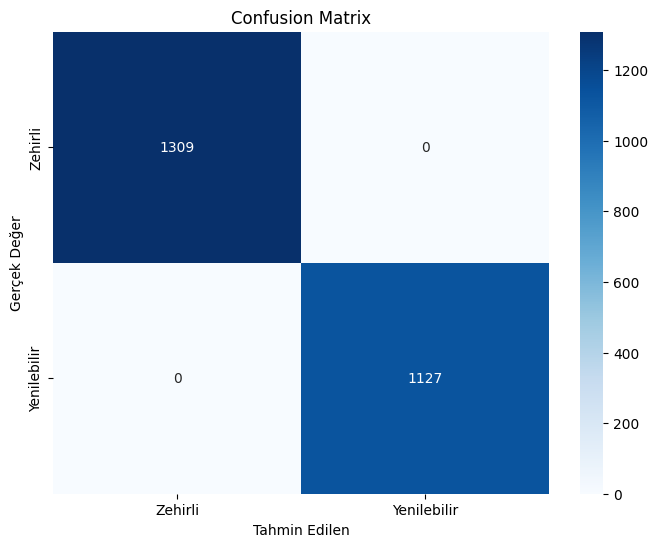

In [248]:
# Sƒ±nƒ±flandƒ±rma raporu
y_pred = (model_fold.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Karƒ±≈üƒ±klƒ±k matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Zehirli', 'Yenilebilir'], yticklabels=['Zehirli', 'Yenilebilir'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Ger√ßek Deƒüer')
plt.show()

In [249]:
#Grafik Yorumu (Confusion Matris):
# Confusion matrisi, modelin tahminlerinin ger√ßek deƒüerlerle nasƒ±l kar≈üƒ±la≈ütƒ±ƒüƒ±nƒ± g√∂sterir.
# Matrisin k√∂≈üegenindeki deƒüerler doƒüru tahminleri, diƒüer deƒüerler ise yanlƒ±≈ü tahminleri g√∂sterir.

* ROC Curve (Alƒ±cƒ± √áalƒ±≈üma Karakteristik Eƒürisi)

77/77 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step   


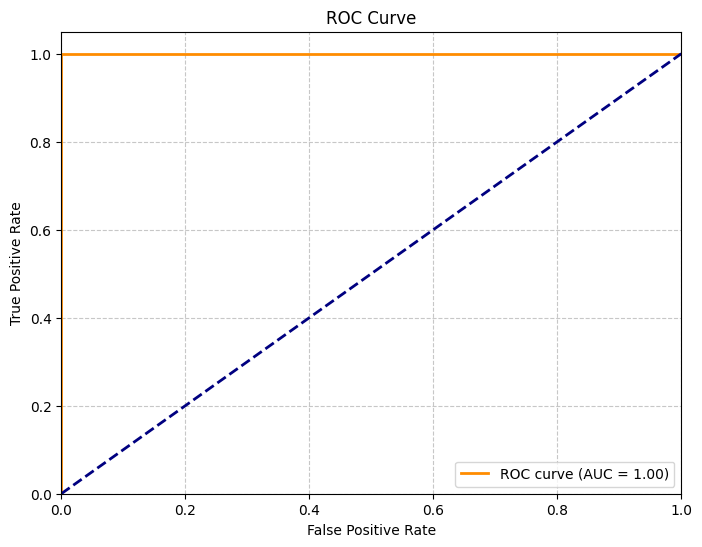

In [250]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Olasƒ±lƒ±k tahminleri alƒ±nmalƒ±!
y_pred_proba = model_fold.predict(x_test)

# ROC curve i√ßin deƒüerler
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC grafiƒüi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [251]:
#Grafik Yorumu (ROC Eƒürisi):
# ROC eƒürisi, modelin sƒ±nƒ±flandƒ±rma performansƒ±nƒ± g√∂sterir.
# Eƒürinin altƒ±nda kalan alan (AUC), modelin genel ba≈üarƒ±sƒ±nƒ± √∂l√ßer.
# AUC deƒüeri 0.5 ile 1 arasƒ±nda deƒüi≈üir.
# 0.5, rastgele tahminleri temsil ederken, 1.0 m√ºkemmel bir modeli temsil eder.


* Ana Model ile Eƒüitim ve deƒüerledirme (Cross-validation olmadan)

In [252]:
# Modeli olu≈ütur
model = Sequential()
# 1. ƒ∞lk (Giri≈ü) Katmanlarƒ±
# relu aktivasyon fonksiyonu, doƒürusal olmayan ili≈ükileri √∂ƒürenmeyi saƒülar
# 115 n√∂ron, ReLU aktivasyon fonksiyonu, giri≈ü ≈üekli x_train'in boyutu
# BatchNormalization ve Dropout katmanlarƒ± ekleriz
model.add(GaussianNoise(0.1, input_shape=(x_train.shape[1],)))  # 0.1: noise std
model.add(Dense(115, activation='relu'))
#BatchNormalization(): 
# Eƒüitim sƒ±rasƒ±nda katman √ßƒ±ktƒ±sƒ±nƒ± normalize eder,√∂ƒürenmeyi hƒ±zlandƒ±rƒ±r ve daha stabil hale getirir.
model.add(BatchNormalization())
# Dropout: A≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemek i√ßin rastgele n√∂ronlarƒ± kapatƒ±r
model.add(Dropout(0.3))

# 2. Orta (Gizli) Katmanlar
# 64 n√∂ron, ReLU aktivasyon fonksiyonu
model.add(Dense(55, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# 3. √áƒ±kƒ±≈ü Katmanƒ±
# 1 n√∂ron, sigmoid aktivasyon fonksiyonu (binary classification i√ßin)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Eƒüitme
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - accuracy: 0.8751 - loss: 0.2750 - precision: 0.8634 - recall: 0.8793 - val_accuracy: 0.9955 - val_loss: 0.0704 - val_precision: 0.9921 - val_recall: 0.9982
Epoch 2/50
178/178 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.9912 - loss: 0.0292 - precision: 0.9904 - recall: 0.9920 - val_accuracy: 0.9996 - val_loss: 0.0061 - val_precision: 1.0000 - val_recall: 0.9991
Epoch 3/50
178/178 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0195 - precision: 0.9949 - recall: 0.9928 - val_accuracy: 1.0000 - val_loss: 0.0016 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
178/178 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0114 - precision: 0.9991 - recall: 0.9973 - val_accuracy: 1.0000 - val_loss: 4.5108e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5

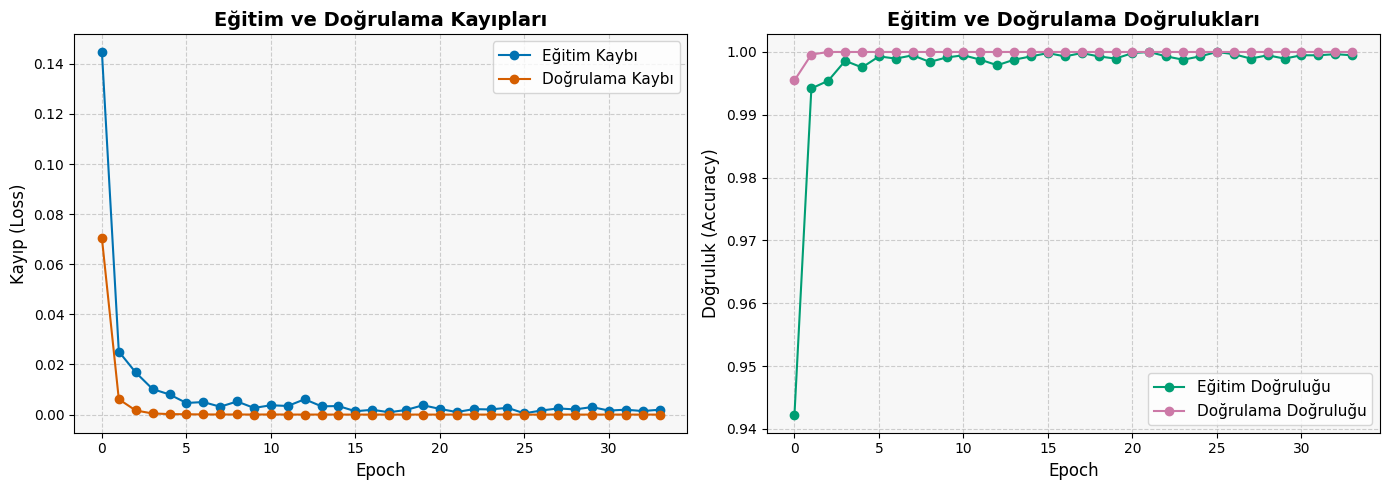

In [253]:
# Eƒüitim ve doƒürulama kaybƒ± ve doƒüruluƒüunu g√∂rselle≈ütirme

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Kayƒ±p (Loss) grafiƒüi
axs[0].plot(history.history['loss'], label='Eƒüitim Kaybƒ±', marker='o', color='#0072B2')
axs[0].plot(history.history['val_loss'], label='Doƒürulama Kaybƒ±', marker='o', color='#D55E00')
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Kayƒ±p (Loss)', fontsize=12)
axs[0].set_title('Eƒüitim ve Doƒürulama Kayƒ±plarƒ±', fontsize=14, fontweight='bold')
axs[0].legend(fontsize=11)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_facecolor('#f7f7f7')

# Doƒüruluk (Accuracy) grafiƒüi
axs[1].plot(history.history['accuracy'], label='Eƒüitim Doƒüruluƒüu', marker='o', color='#009E73')
axs[1].plot(history.history['val_accuracy'], label='Doƒürulama Doƒüruluƒüu', marker='o', color='#CC79A7')
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Doƒüruluk (Accuracy)', fontsize=12)
axs[1].set_title('Eƒüitim ve Doƒürulama Doƒüruluklarƒ±', fontsize=14, fontweight='bold')
axs[1].legend(fontsize=11)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

In [254]:
#Grafik yorumu (Eƒüitim ve Doƒürulama Kayƒ±plarƒ± ve Doƒüruluklarƒ±):
# Eƒüitim ve doƒürulama kaybƒ± (loss) grafiƒüinde, eƒüitim kaybƒ±nƒ±n zamanla azaldƒ±ƒüƒ±nƒ± ve doƒürulama kaybƒ±nƒ±n da benzer ≈üekilde azaldƒ±ƒüƒ±nƒ± g√∂r√ºyoruz.
# Bu, modelin hem eƒüitim hem de doƒürulama setlerinde iyi bir ≈üekilde √∂ƒürenme ger√ßekle≈ütirdiƒüini g√∂steriyor.
# Eƒüitim kaybƒ± genellikle doƒürulama kaybƒ±ndan daha d√º≈ü√ºk olur, bu da modelin eƒüitim verisine iyi uyum saƒüladƒ±ƒüƒ±nƒ± g√∂sterir.
# Eƒüitim ve doƒürulama doƒüruluƒüu (accuracy) grafiƒüinde, eƒüitim doƒüruluƒüunun zamanla arttƒ±ƒüƒ±nƒ± ve doƒürulama doƒüruluƒüunun da benzer ≈üekilde arttƒ±ƒüƒ±nƒ± g√∂r√ºyoruz.
# Bu, modelin hem eƒüitim hem de doƒürulama setlerinde iyi bir performans g√∂sterdiƒüini g√∂steriyor.

